In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import json
from itertools import chain
%matplotlib inline

In [8]:
def display_img(img):
    fig = plt.figure(figsize = (8, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [95]:
def take_img(path):
    if '.tif' in path:
        img_example = cv2.imread(path)
    else:
        imgs_names = os.listdir(path)

        random_img = random.choice(imgs_names)

        path = os.path.join(path, random_img)

        img_example = cv2.imread(path)
    
    return img_example

In [60]:
def draw_polygons(img, img_polygons):
    for p in img_polygons:
        coordinates = p['coordinates']
        pts = np.array(coordinates, np.int32)
        cv2.fillPoly(img_copy, [pts], color = (0, 255, 0))
    display_img(img_copy)

In [83]:
def mask_generator(img, img_polygons):
    mask = np.zeros((512, 512))
    coordinates_join = []
    for p in img_polygons:
        coordinates = p['coordinates'][0]
        coordinates_join.append(coordinates)
    coordinates_vessel = list(chain.from_iterable(coordinates_join))
    for coord in coordinates_vessel:
        mask[coord[1], coord[0]] = 1
        
    return mask

In [125]:
with open('../data/polygons.jsonl', 'r') as f:
    polygons = [json.loads(line) for line in f]

In [135]:
img_name = '0c05e3861510'

In [137]:
img_example = take_img('../data/labels/' + img_name + '_mask.tif')# + img_name + '.tif'

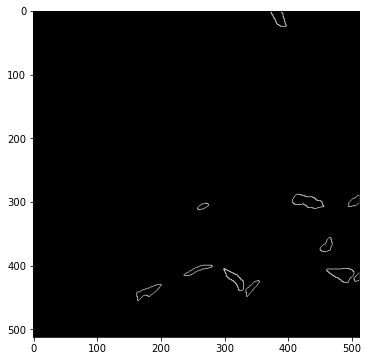

In [138]:
display_img(img_example)

In [67]:
annotations_img = next(item['annotations'] for item in polygons if item['id'] == img_name)

In [68]:
annotations_blood_vessel = [d for d in annotations_img if d['type'] == 'blood_vessel']

In [69]:
img_copy = img_example.copy()

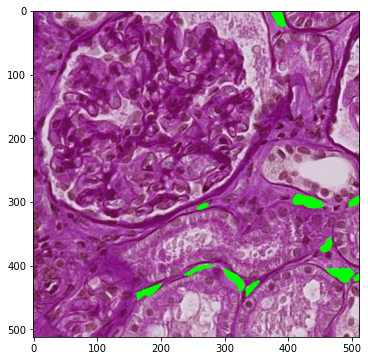

In [70]:
draw_polygons(img_copy, annotations_blood_vessel)

In [84]:
mask = mask_generator(img_example, annotations_blood_vessel)

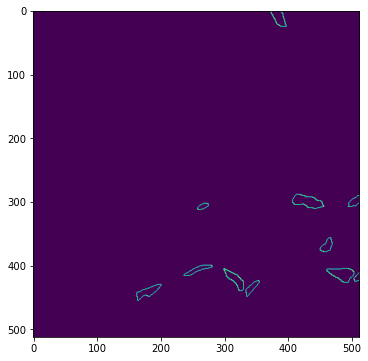

In [85]:
display_img(mask)

In [133]:
def mask_generator(img_polygons):
    mask = np.zeros((512, 512))
    coordinates_join = []
    for p in img_polygons:
        coordinates = p['coordinates'][0]
        coordinates_join.append(coordinates)
    coordinates_vessel = list(chain.from_iterable(coordinates_join))
    for coord in coordinates_vessel:
        mask[coord[1], coord[0]] = 1
    
    mask = mask.astype(np.uint8)
        
    return mask

In [134]:
for p in polygons:
    img_name = p['id']
    polygons_blood_vessel = [d for d in p['annotations'] if d['type'] == 'blood_vessel']
    mask = mask_generator(polygons_blood_vessel)
    cv2.imwrite('../data/labels/' + img_name + '_mask.tif', mask)